In [5]:
import pandas as pd
import numpy as np


In [6]:
data_train = pd.read_excel('train_nor_811.xlsx') 
data_test = pd.read_excel('test_nor_811.xlsx')
data_val= pd.read_excel('valid_nor_811.xlsx')




data = data_train.append(data_test, ignore_index=True)
df= data.append(data_val, ignore_index=True)


print(df.Emotion.value_counts())

temp.head(10)


Enjoyment    1965
Disgust      1338
Other        1291
Sadness      1149
Anger         480
Fear          395
Surprise      309
Name: Emotion, dtype: int64


,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
5,1220,Anger,thằng kia sao mày bắt vợ với bồ tao dọn thế ki...
6,44,Other,một lí do trog muôn vàn lí do
7,1951,Surprise,thật hay đùa ác vậy . không thể tin được
8,1249,Anger,"ko phải con mình , mà xem còn thấy đau như vậy..."
9,1063,Sadness,per nghe đi rồi khóc 1 trận cho thoải mái . đừ...


In [7]:
df.head()

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...


In [8]:
df.tail()

,Unnamed: 0,Emotion,Sentence
6922,1290,Sadness,nhọc lòng :(((
6923,881,Sadness,tao đã rất muốn làm bạn tốt anh em tri kỉ với ...
6924,1689,Disgust,cơm tấm ở ngoài cũng như này . 😡
6925,1779,Surprise,chất liệu đỉnh quá
6926,1486,Anger,dume lũ mất dạy . bố mẹ cho mày ăn học để dơ n...


In [9]:
df["Emotion"].value_counts()

Enjoyment    1965
Disgust      1338
Other        1291
Sadness      1149
Anger         480
Fear          395
Surprise      309
Name: Emotion, dtype: int64

In [10]:
class_names = ['Enjoyment', 
    'Disgust',
    'Other',
    'Sadness',
    'Anger',
     'Fear',
    'Surprise' ,        
 ]

In [11]:
encoding = {
    'Enjoyment':0, 
    'Disgust':1,
    'Other':2,
    'Sadness':3,
    'Anger':4,
    'Fear':5,
    'Surprise':6 
}

In [12]:
text = df['Sentence'].values.tolist()
emotion= df['Emotion'].tolist()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [14]:
df["Emotion"].value_counts()

Enjoyment    1965
Disgust      1338
Other        1291
Sadness      1149
Anger         480
Fear          395
Surprise      309
Name: Emotion, dtype: int64

In [15]:
import ktrain
from ktrain import text
MODEL_NAME = 'trituenhantaoio/bert-base-vietnamese-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)


Downloading:   0%|          | 0.00/846 [00:00<?, ?B/s]

In [16]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: vi
train sequence lengths:
	mean : 14
	95percentile : 32
	99percentile : 49


Downloading:   0%|          | 0.00/238 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: vi
test sequence lengths:
	mean : 14
	95percentile : 32
	99percentile : 47


In [17]:
model = t.get_classifier()

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [18]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [20]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
924/924 [==============================] - 9873s 11s/step - loss: 1.6504 - accuracy: 0.3570 - val_loss: 1.4546 - val_accuracy: 0.4322
Epoch 2/5
924/924 [==============================] - 9717s 11s/step - loss: 1.3016 - accuracy: 0.5097 - val_loss: 1.3876 - val_accuracy: 0.4863
Epoch 3/5
924/924 [==============================] - 9707s 11s/step - loss: 1.0129 - accuracy: 0.6396 - val_loss: 1.3575 - val_accuracy: 0.5065
Epoch 4/5
924/924 [==============================] - 9720s 11s/step - loss: 0.5322 - accuracy: 0.8262 - val_loss: 1.5388 - val_accuracy: 0.5267
Epoch 5/5
924/924 [==============================] - 9628s 10s/step - loss: 0.1752 - accuracy: 0.9560 - val_loss: 1.6747 - val_accuracy: 0.5375


In [21]:
learner.validate(val_data=(val), class_names=class_names)

              precision    recall  f1-score   support

   Enjoyment       0.47      0.34      0.39        83
     Disgust       0.52      0.54      0.53       288
       Other       0.63      0.71      0.66       398
     Sadness       0.69      0.53      0.60        85
       Anger       0.40      0.41      0.40       253
        Fear       0.55      0.51      0.53       218
    Surprise       0.40      0.34      0.37        61

    accuracy                           0.54      1386
   macro avg       0.52      0.48      0.50      1386
weighted avg       0.54      0.54      0.53      1386



array([[ 28,  32,   6,   5,   6,   5,   1],
       [ 21, 155,  43,   1,  46,  17,   5],
       [  0,  39, 282,   3,  45,  26,   3],
       [  4,   7,   9,  45,   8,  10,   2],
       [  4,  38,  56,   5, 103,  31,  16],
       [  2,  19,  38,   5,  38, 111,   5],
       [  1,   8,  17,   1,  11,   2,  21]], dtype=int64)

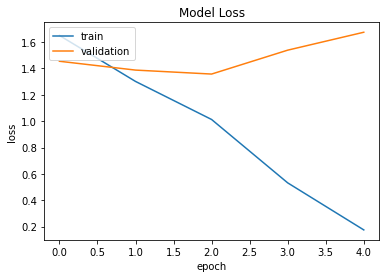

In [22]:
learner.plot('loss')